<a href="https://colab.research.google.com/github/eray0zer/meyve-360/blob/main/meyve360.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np 
import pandas as pd 
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib
import PIL

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Activation, Dense





In [ ]:
!unzip "/content/drive/MyDrive/fruits-360.zip"

In [ ]:
print("Tensorflow version " + tf.__version__)

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found - On for CPU time!')
else:
    print('Found GPU at {}'.format(device_name))

In [ ]:
train_path = '/content/fruits-360/Training/'
test_path = '/content/fruits-360/Test/'

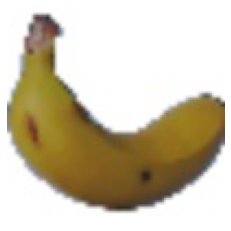

In [ ]:
img = load_img(train_path + "Banana/56_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [ ]:
images = ['Orange', 'Banana', 'Cauliflower', 'Apricot', 'Eggplant', 'Avocado', 'Blueberry','Lemon', 'Kiwi']

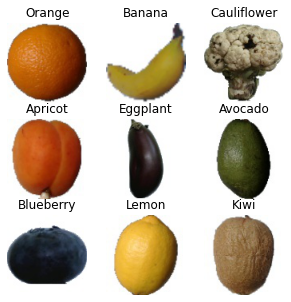

In [ ]:
  fig = plt.figure(figsize =(5,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + images[i] +"/0_100.jpg", target_size=(100,100)))

### **MODEL**

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape= x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(len(siniflar)))#output
model.add(Activation("softmax"))

In [ ]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

Data augmentation ile daha iyi başarı oranı yakalamak istiyoruz.
Bu sayede daha fazla verimiz olacak ve overfittingi önlemiş olucaz.


*   rescale: normalizasyon işlemi
*   horizantal_flip : resmi çevirme (yatay)
*   vertical_flip : resmi çevirme (dikey)

*   shear_range	: makas açısı
*   zoom_range	: random zoom

in degrees)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=False, shear_range = 0.3, zoom_range = 0.3)

# test verisinin orijinal kalmasını istiyoruz.
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#generator oluşturma
train_generator = train_datagen.flow_from_directory(train_path, target_size=(100, 100), batch_size=32, class_mode='categorical', color_mode="rgb")

test_generator = test_datagen.flow_from_directory(test_path, target_size=(100, 100), batch_size=32, class_mode='categorical', color_mode="rgb")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
siniflar = []
for key in train_generator.class_indices:

    siniflar.append(key)
len(siniflar)

131

In [ ]:
hist = model.fit(train_generator, 
                   steps_per_epoch = 1600 // 32,
                   epochs = 100,
                   validation_data = test_generator,
                   validation_steps = 800 // 32)

Epoch 1/100
50/50 [==============================] - 30s 574ms/step - loss: 4.7032 - accuracy: 0.0388 - val_loss: 4.5801 - val_accuracy: 0.0500
Epoch 2/100
50/50 [==============================] - 28s 566ms/step - loss: 3.9184 - accuracy: 0.0900 - val_loss: 3.2066 - val_accuracy: 0.2025
Epoch 3/100
50/50 [==============================] - 28s 569ms/step - loss: 3.3095 - accuracy: 0.1612 - val_loss: 2.9025 - val_accuracy: 0.2262
Epoch 4/100
50/50 [==============================] - 29s 570ms/step - loss: 2.6609 - accuracy: 0.2794 - val_loss: 1.8180 - val_accuracy: 0.5312
Epoch 5/100
50/50 [==============================] - 29s 569ms/step - loss: 2.2063 - accuracy: 0.3787 - val_loss: 1.5685 - val_accuracy: 0.5500
Epoch 6/100
50/50 [==============================] - 28s 567ms/step - loss: 1.8000 - accuracy: 0.4781 - val_loss: 1.4350 - val_accuracy: 0.5600
Epoch 7/100
50/50 [==============================] - 30s 594ms/step - loss: 1.6451 - accuracy: 0.5119 - val_loss: 1.0549 - val_accuracy:

In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


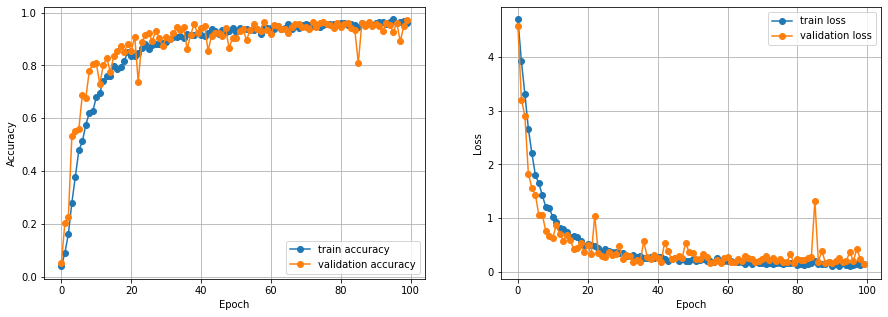

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'], 'o-', label='train accuracy')
plt.plot(hist.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(hist.history['loss'], 'o-', label='train loss')
plt.plot(hist.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
def get_confusion_matrix(data_path, N):
  # we need to see the data in the same order
  # for both predictions and targets
  print("Generating confusion matrix", N)
  predictions = []
  targets = []
  i = 0
  n_images = 0
  for x, y in test_datagen.flow_from_directory(
      data_path,
      target_size=(100, 100),
      shuffle=False,
      batch_size=32 * 2):
    i += 1
    n_images += len(y)
    if i % 50 == 0:
      print(f'{n_images} images processed.')
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break

  cm = confusion_matrix(targets, predictions)
  return cm

In [ ]:
# useful for getting number of files
from glob import glob

train_files = glob(train_path + '/*/*.jp*g')
test_files = glob(test_path + '/*/*.jp  *g')

In [ ]:
print(len(train_files))
print(len(test_files))

67692
22688


In [ ]:
cm = get_confusion_matrix(train_path, len(train_files))
print(cm)

Generating confusion matrix 67692
Found 67692 images belonging to 131 classes.
3200 images processed.
6400 images processed.
9600 images processed.
12800 images processed.
16000 images processed.
19200 images processed.
22400 images processed.
25600 images processed.
28800 images processed.
32000 images processed.
35200 images processed.
38400 images processed.
41600 images processed.
44800 images processed.
48000 images processed.
51200 images processed.
54400 images processed.
57600 images processed.
60800 images processed.
64000 images processed.
67200 images processed.
[[492   0   0 ...   0   0   0]
 [  0 444   0 ...   0   0   0]
 [  0   0 480 ...   0   0   0]
 ...
 [  0   0   0 ... 466   0   0]
 [  0   0   0 ...   0 735   0]
 [  0   0   0 ...   0   0 475]]


In [ ]:
valid_cm = get_confusion_matrix(test_path, len(valid_image_files))
print(valid_cm)

Generating confusion matrix 22688
Found 22688 images belonging to 131 classes.
3200 images processed.
6400 images processed.
9600 images processed.
12800 images processed.
16000 images processed.
19200 images processed.
22400 images processed.
[[164   0   0 ...   0   0   0]
 [  0 148   0 ...   0   0   0]
 [  0   0 160 ...   0   0   0]
 ...
 [  0   0   0 ... 101   0   0]
 [  0   0   0 ...   0 249   0]
 [  0   0   0 ...   0   0 157]]


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.figure(figsize=(30, 30))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix, without normalization
[[492   0   0 ...   0   0   0]
 [  0 444   0 ...   0   0   0]
 [  0   0 480 ...   0   0   0]
 ...
 [  0   0   0 ... 466   0   0]
 [  0   0   0 ...   0 735   0]
 [  0   0   0 ...   0   0 475]]


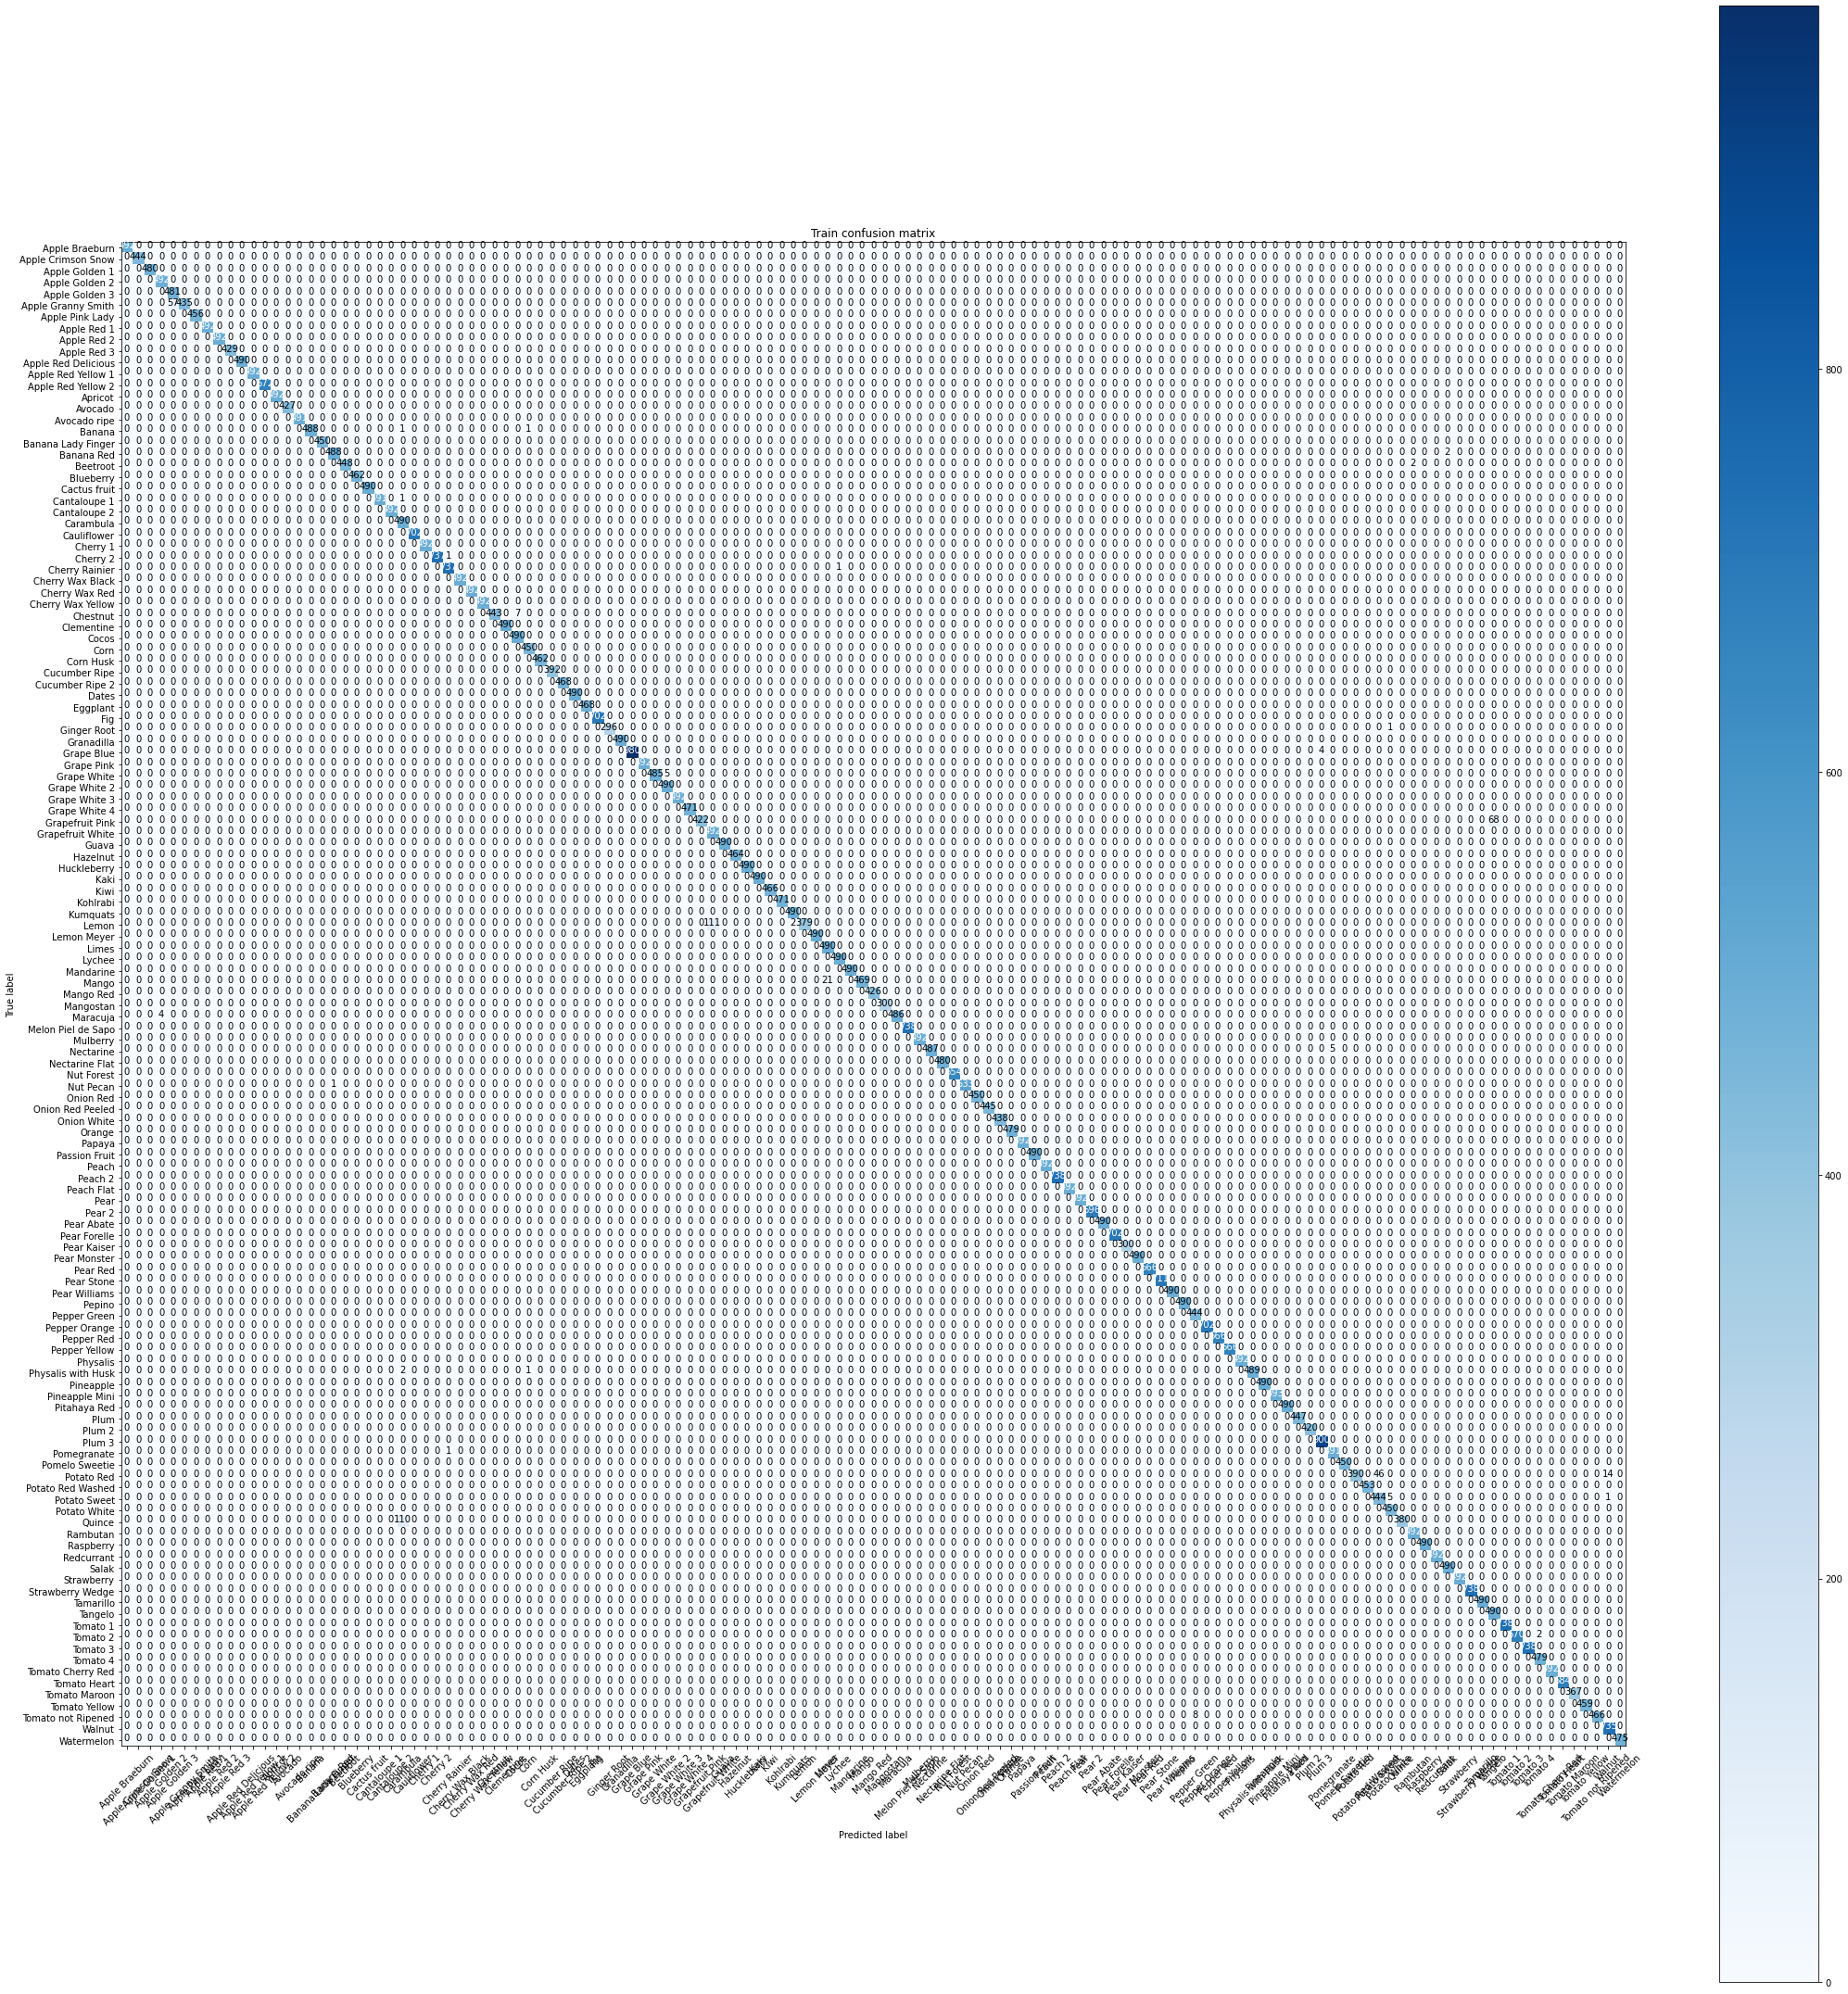

In [ ]:
import itertools


plot_confusion_matrix(cm, siniflar, title='Train confusion matrix')

Olasılık: %99.99977
Tahmin: Kiwi


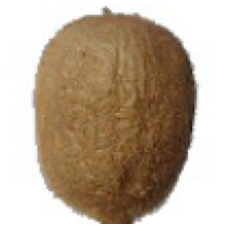

In [ ]:
from keras.preprocessing import image

labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())

ImagePath='/content/fruits-360/Test/Kiwi/59_100.jpg'
img = image.load_img(ImagePath, target_size=(100, 100))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0


plt.axis('off')
plt.imshow(img.squeeze())

p= model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Olasılık: %{0:.5f}".format((np.max(p[0], axis=-1)*100)))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Tahmin:",predicted_class)

Olasılık: %63.90
Tahmin: Grapefruit White


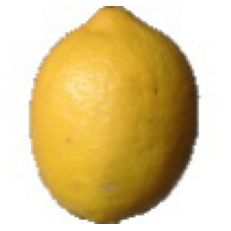

In [ ]:
labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())

ImagePath='/content/fruits-360/Test/Lemon/37_100.jpg'
img = image.load_img(ImagePath, target_size=(100, 100))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0


plt.axis('off')
plt.imshow(img.squeeze())

p= model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Olasılık: %{0:.2f}".format((np.max(p[0], axis=-1)*100)))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Tahmin:",predicted_class)

Olasılık: %99.99999
Tahmin: Dates


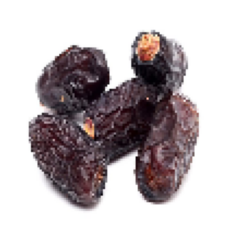

In [ ]:
labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())

ImagePath='/content/drive/MyDrive/safavi-500-g-d790 (1).jpg'
img = image.load_img(ImagePath, target_size=(100, 100))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0


plt.axis('off')
plt.imshow(img.squeeze())

p= model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Olasılık: %{0:.5f}".format((np.max(p[0], axis=-1)*100)))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Tahmin:",predicted_class)

Olasılık: %100.00000
Tahmin: Pepper Green


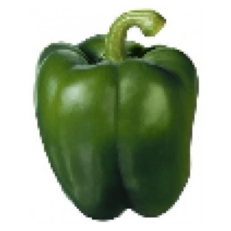

In [ ]:
labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())

ImagePath='/content/drive/MyDrive/standart-aci-dolma-biber-fidesi-70-550x550.jpg'
img = image.load_img(ImagePath, target_size=(100, 100))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0


plt.axis('off')
plt.imshow(img.squeeze())

p= model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Olasılık: %{0:.5f}".format((np.max(p[0], axis=-1)*100)))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Tahmin:",predicted_class)

Olasılık: %99.99963
Tahmin: Tomato 2


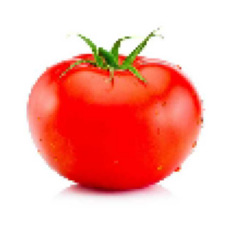

In [ ]:

labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())

ImagePath='/content/drive/MyDrive/sebze-38-sebzeler-manav-23805-26-B.jpg'
img = image.load_img(ImagePath, target_size=(100, 100))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0


plt.axis('off')
plt.imshow(img.squeeze())

p= model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Olasılık: %{0:.5f}".format((np.max(p[0], axis=-1)*100)))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Tahmin:",predicted_class)

Olasılık: %60.76203
Tahmin: Nut Pecan


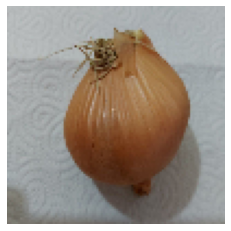

In [ ]:


labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())

ImagePath='/content/drive/MyDrive/photo_2022-05-19_01-47-03.jpg'
img = image.load_img(ImagePath, target_size=(100, 100))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0


plt.axis('off')
plt.imshow(img.squeeze())

p= model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Olasılık: %{0:.5f}".format((np.max(p[0], axis=-1)*100)))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Tahmin:",predicted_class)

Olasılık: %73.97735
Tahmin: Physalis with Husk


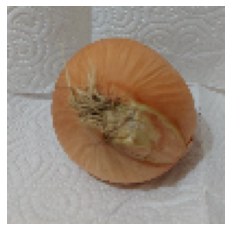

In [ ]:


labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())

ImagePath='/content/drive/MyDrive/photo_2022-05-19_01-50-31.jpg'
img = image.load_img(ImagePath, target_size=(100, 100))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0


plt.axis('off')
plt.imshow(img.squeeze())

p= model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Olasılık: %{0:.5f}".format((np.max(p[0], axis=-1)*100)))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Tahmin:",predicted_class)

Olasılık: %50.85950
Tahmin: Physalis with Husk


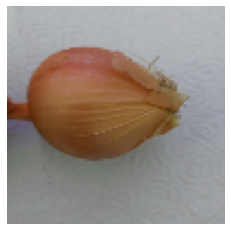

In [ ]:

labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())

ImagePath='/content/drive/MyDrive/photo_2022-05-19_01-44-30.jpg'
img = image.load_img(ImagePath, target_size=(100, 100))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0


plt.axis('off')
plt.imshow(img.squeeze())

p= model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Olasılık: %{0:.5f}".format((np.max(p[0], axis=-1)*100)))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Tahmin:",predicted_class)

Olasılık: %77.77593
Tahmin: Nut Pecan


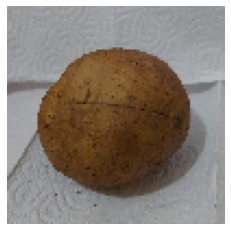

In [ ]:

labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())

ImagePath='/content/drive/MyDrive/pattes.jpg'
img = image.load_img(ImagePath, target_size=(100, 100))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0


plt.axis('off')
plt.imshow(img.squeeze())

p= model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Olasılık: %{0:.5f}".format((np.max(p[0], axis=-1)*100)))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Tahmin:",predicted_class)

Olasılık: %74.12457
Tahmin: Kiwi


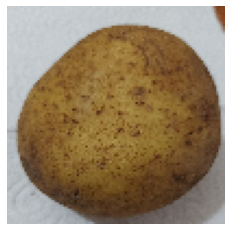

In [ ]:

labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())

ImagePath='/content/drive/MyDrive/pattes2.png'
img = image.load_img(ImagePath, target_size=(100, 100))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0


plt.axis('off')
plt.imshow(img.squeeze())

p= model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Olasılık: %{0:.5f}".format((np.max(p[0], axis=-1)*100)))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Tahmin:",predicted_class)

Olasılık: %87.39176
Tahmin: Tomato not Ripened


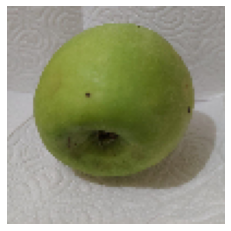

In [ ]:
labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())

ImagePath='/content/drive/MyDrive/photo_2022-05-19_02-09-17.jpg'
img = image.load_img(ImagePath, target_size=(100, 100))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0


plt.axis('off')
plt.imshow(img.squeeze())

p= model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Olasılık: %{0:.5f}".format((np.max(p[0], axis=-1)*100)))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Tahmin:",predicted_class)